# 1)- Importing key modules

In [1]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re    # for regular expressions 
import nltk  # for text manipulation 
#For other text data
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

import string 
import numpy as np 
import pickle
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#https://textblob.readthedocs.io/en/dev/install.html
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [4]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [5]:
# for dynamic visuals
import plotly as py
import cufflinks as cf

In [6]:
# for offline mode in notebook
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [7]:
%reload_ext version_information
%version_information pandas,numpy, nltk, seaborn, matplotlib

Software versions
Python 3.7.7 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.13.0
OS Windows 10 10.0.17763 SP0
pandas 1.0.3
numpy 1.18.1
nltk 3.5
seaborn 0.10.1
matplotlib 3.1.3
Mon Jun 22 15:16:30 2020 W. Europe Daylight Time

# 2)- Loading Dataset

In [8]:
data=pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col=[0])
data.shape

(23486, 10)

In [9]:
data.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [10]:
data=data.drop(['Clothing ID','Title'], axis=1)

In [11]:
data.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

### 2.1)-Types of features in our dataset

In [12]:
data.dtypes.value_counts()

int64     4
object    4
dtype: int64

In [13]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(data)
table_dtype

Data Type
Age                         int64
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Review Text                object
Division Name              object
Department Name            object
Class Name                 object

### 2.2. Missing values check

In [14]:
data.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

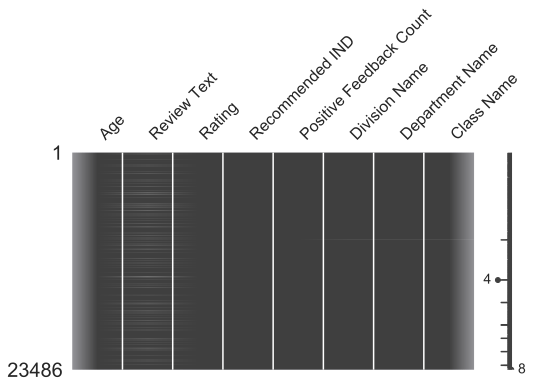

In [15]:
import missingno
missingno.matrix(data, figsize = (8,4))

In [16]:
# Checking rows now
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

In [17]:
summary_missing(data)

No. of fields:  23486
No. of missing fields:  4


No. of mising Value  %age of missing Value
Review Text                      845                    3.6
Division Name                     14                    0.1
Department Name                   14                    0.1
Class Name                        14                    0.1

**check where those missing values occur for "Class Name" feature only**

In [18]:
class_name=data['Class Name']

In [19]:
class_name.loc[class_name.isnull()]

9444     NaN
13767    NaN
13768    NaN
13787    NaN
16216    NaN
16221    NaN
16223    NaN
18626    NaN
18671    NaN
20088    NaN
21532    NaN
22997    NaN
23006    NaN
23011    NaN
Name: Class Name, dtype: object

We know where those 14 missing values are and at exact what index

**How about "Department Name"**

In [20]:
dept_name=data['Department Name']

In [21]:
dept_name.loc[dept_name.isnull()]

9444     NaN
13767    NaN
13768    NaN
13787    NaN
16216    NaN
16221    NaN
16223    NaN
18626    NaN
18671    NaN
20088    NaN
21532    NaN
22997    NaN
23006    NaN
23011    NaN
Name: Department Name, dtype: object

These missing values occur exact at same point. We can check each feature one by one or we can save time and see all points

**checking missing value points for all dataset**

In [22]:
col_mask=data.isnull().any(axis=0)

In [23]:
row_mask=data.isnull().any(axis=1)

In [24]:
data.loc[row_mask,col_mask]

Review Text   Division Name Department Name Class Name
92            NaN  General Petite            Tops      Knits
93            NaN         General         Dresses    Dresses
98            NaN         General         Jackets  Outerwear
135           NaN  General Petite            Tops      Knits
142           NaN         General         Jackets  Outerwear
...           ...             ...             ...        ...
23258         NaN         General            Tops      Knits
23301         NaN         General            Tops      Knits
23303         NaN         General            Tops    Blouses
23470         NaN  General Petite         Dresses    Dresses
23480         NaN  General Petite            Tops      Knits

[858 rows x 4 columns]

These are rows that are supposed to have missing values

In [25]:
# we check from difference ranges of occurances
data.loc[row_mask,col_mask][50:60]

Review Text   Division Name Department Name Class Name
1425         NaN  General Petite         Dresses    Dresses
1454         NaN       Initmates        Intimate  Intimates
1471         NaN  General Petite         Bottoms     Skirts
1485         NaN  General Petite         Dresses    Dresses
1534         NaN         General            Tops   Sweaters
1562         NaN         General         Dresses    Dresses
1573         NaN         General         Dresses    Dresses
1582         NaN         General         Dresses    Dresses
1611         NaN  General Petite         Bottoms     Skirts
1643         NaN         General            Tops      Knits

### 2.3.Fixing missing values

**Instead of dropping , we shall fill these null values with 'other'**

In [26]:
data=data.fillna('other')

In [27]:
summary_missing(data)

No. of fields:  23486
No. of missing fields:  0


Empty DataFrame
Columns: [No. of mising Value, %age of missing Value]
Index: []

# 3)- Exporing Features

### 3.1)- Review Text

In [28]:
data['Review Text'].head(2)

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
Name: Review Text, dtype: object

In [29]:
#converting to list
review_list=data['Review Text'].tolist()
type(review_list)

list

In [30]:
review_list[0]

'Absolutely wonderful - silky and sexy and comfortable'

In [31]:
review_str=' '.join(data['Review Text'].tolist())
type(review_str)

str

In [32]:
review_str[:100]

"Absolutely wonderful - silky and sexy and comfortable Love this dress!  it's sooo pretty.  i happene"

Here each word is acting as string. Classical coders like to convert dataframe --> Series --> list -->str 
Advantage is that in the end text is taken as string and we get clear idea how later stages make sense such as cleaning data and tokenization

### 3.2)- Expansion for contracted words


for text cleaning part

In [33]:
contractions = { 
"ain't": "am not ",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
    
}

In [34]:
def expand(x):
    if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value=contractions[key]
            x=x.replace(key, value)
        return x
    else: 
        return x

In [35]:
sample_text = "I don't like coffee as it makes me thirsty\""

In [36]:
print(expand(sample_text))

I do not like coffee as it makes me thirsty"


In [37]:
# apply to text in data
%time
data['Review Text']= data['Review Text'].apply(lambda x: expand(x))

Wall time: 0 ns


In [38]:
print(' '.join(data['Review Text'].tolist())[:1000])

Absolutely wonderful - silky and sexy and comfortable Love this dress!  it is sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it is petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt is

# 4)- Feature Engineering

### 4.1. creating polarity feature


for reviews

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid= SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hassan.sherwani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
data['polarity'] = data['Review Text']. apply(lambda x: TextBlob(x).sentiment.polarity)

In [41]:
data.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  polarity  
0  Intimates  0.633333  
1    Dresses  0.339583  
2    Dresses  0.073675  
3      Pants  0.550000  
4    Blouses  0.512891

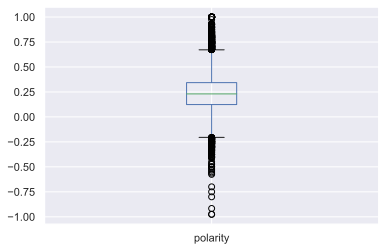

In [42]:
data.polarity.plot(kind='box')

Value at 0 = Neutral
value < Negative
value > Positive


- We can see that general sentiments of these reviews have median value at 0.25 meaning that overall reviews are positive
- The lower threshold point is around -0.25. Anything below is outlier case for even negative sentiments. Some are very low even at minus 0.75 and minus 1 and are outliers of higher proportions or extreme case.
- The threshold for positive sentiment is 0.70.Anything above is outliers. There are few cases but they are not like negative.
- Finally mean value is 0.25 and it has an above and lower margin somewhat between as higher as 0.30 and as low as 0.20. Hence, it shows that for a general review ......even lower mean value of sentiment is 0.20 which is positive sentiment

### 4.2.Sentiment extraction

- separate features

In [43]:
data['compound_polarity'] = data['Review Text'].apply(lambda x:sid.polarity_scores(x)['compound'])
data['neutral']= data['Review Text'].apply(lambda x:sid.polarity_scores(x)['neu'])
data['neg']= data['Review Text'].apply (lambda x:sid.polarity_scores(x)['neg'])
data['pos']= data['Review Text'].apply(lambda x:sid.polarity_scores(x)['pos'])
data['sent_type']=''

In [44]:
data.head(3)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   

   Recommended IND  Positive Feedback Count Division Name Department Name  \
0                1                        0     Initmates        Intimate   
1                1                        4       General         Dresses   
2                0                        0       General         Dresses   

  Class Name  polarity  compound_polarity  neutral    neg    pos sent_type  
0  Intimates  0.633333             0.8932    0.272  0.000  0.728            
1    Dresses  0.339583             0.9729    0.673  0.000  0.327            
2    Dresses  0.073675             0.9427    0.792  0.027  0.181

In [45]:
data.loc[data.compound_polarity > 0, 'sent_type']= 'pos'

data.loc[data.compound_polarity == 0, 'sent_type']= 'neut'

data.loc[data.compound_polarity < 0, 'sent_type']= 'neg'

In [46]:
data.head(3)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   

   Recommended IND  Positive Feedback Count Division Name Department Name  \
0                1                        0     Initmates        Intimate   
1                1                        4       General         Dresses   
2                0                        0       General         Dresses   

  Class Name  polarity  compound_polarity  neutral    neg    pos sent_type  
0  Intimates  0.633333             0.8932    0.272  0.000  0.728       pos  
1    Dresses  0.339583             0.9729    0.673  0.000  0.327       pos  
2    Dresses  0.073675             0.9427    0.792  0.027  0.181       pos

### 4.3. review length

In [47]:
data['review_len']=data['Review Text'].apply(lambda x: len(x))

In [48]:
data['word_count']= data['Review Text'].apply(lambda x: len(x.split()))

In [49]:
data.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  polarity  compound_polarity  neutral    neg    pos sent_type  \
0  Intimates  0.633333             0.8932    0.272  0.000  0.728       pos   
1    Dresses  0.339583             0.9729    0.673  0.000  0.327       pos   
2    Dresses  0.073675             0.9427    0.792  0.027  0.181       pos   
3      Pants  0.550000             0.5727    0.360  0.220  0.421       pos   
4    Blouses  0.512891             0.9291    0.700  0.000  0.300       pos   

   review_len  word_count  
0          53           8  
1         305          64  
2         500          98  
3         125          23  
4         192          36

### 4.4. average word length

In [50]:
def word_avg_len(x):
    words=x.split()
    word_len = 0
    for word in words:
        word_len= word_len + len(word)
    return (word_len)/len(words)

In [51]:
data['avg_len_wrd'] = data['Review Text'].apply(lambda x:word_avg_len(x))

In [52]:
data.head(2)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   

   Recommended IND  Positive Feedback Count Division Name Department Name  \
0                1                        0     Initmates        Intimate   
1                1                        4       General         Dresses   

  Class Name  polarity  compound_polarity  neutral  neg    pos sent_type  \
0  Intimates  0.633333             0.8932    0.272  0.0  0.728       pos   
1    Dresses  0.339583             0.9729    0.673  0.0  0.327       pos   

   review_len  word_count  avg_len_wrd  
0          53           8     5.750000  
1         305          64     3.703125

The average word length in English language is 4.7 characters. Comparing this feature shows us how our data word is spread.

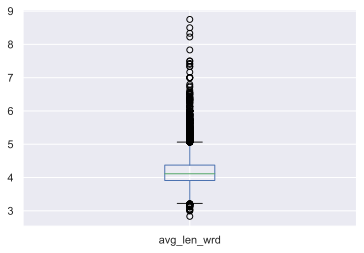

In [53]:
data.avg_len_wrd.plot(kind='box')

- As we can find that mean of word length is 4.2 which is lower than standard. Upper threshold for word length is around 4.5 and lower threshold is 3.9. So spread is very symmetric,
-  For lower end outliers , we have 2.9 and few in 3 which is not very far from 2.9 i.e lower threshold.
- For upper end outliers, we have above 8 whcih is very big difference from upper end threshold value i.e 4.2.
- Consider those outliers are also outliers in terms of standard english language i.e 4.7. Hence, upper end outliers are most significant than lower end outliers 

# 5)- Plotting text Data

### 5.1. Distribution of Polarity

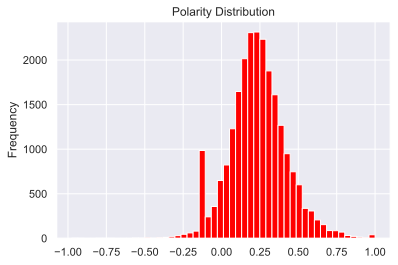

In [54]:
data['polarity'].plot(kind='hist', color='red', bins=50,
                      x='Polarity',
                      y='Count', 
                      title='Polarity Distribution')

#### using plotly

In [55]:
data['polarity'].iplot(kind='hist', color='red', bins=50,
                      xTitle = 'Polarity', yTitle='Count', title='Polarity Distribution')

- We can see that four bar plots contain most of reviews i.e 0.125-0.325. 

- All of these have positive polarity meaning our overall trend of polarity is positive as we have seen in box plot early.

- Negative sentiments are those that are left side of zero. From -0075 to 0.125, we have around 1093 negative sentiments.

#### viewing few positive sentiments at random

In [56]:
sent=data[['Review Text','Rating', 'compound_polarity','sent_type']]

In [57]:
sent[sent.sent_type=='pos'].sample(3)

Review Text  Rating  \
6584   Great dress in terms of material, quality, pri...       4   
8602   Definitely shorter than expected, but a super ...       5   
22314  I love this shirt so much that i bought it in ...       5   

       compound_polarity sent_type  
6584              0.9239       pos  
8602              0.9123       pos  
22314             0.9266       pos

#### viewing few negative sentiments at random

In [58]:
sent[sent.sent_type=='neg'].sample(3)

Review Text  Rating  \
19384  Pretty disappointed in this sweater. should ha...       3   
17116  According to the sizing chart i should be an 8...       3   
5114   What a disappointment and for the price, it is...       1   

       compound_polarity sent_type  
19384            -0.2978       neg  
17116            -0.4819       neg  
5114             -0.7644       neg

In [59]:
sent['Review Text'][22934]

'I bought this dress at my local retailer store on friday and love it! the dress is well made, with some heft to the yarn. the colors of the yarn, blue, white and grey, seem to shimmer a bit due to their weave, but there is no metallic thread in the dress that i can tell. i know some have written that the dress is a sack, but not on me. i toyed with buying this online and then did not due to the negative comments about the dress; i bought an extra small and it fits well (i usually where an x small,'

We can see that Vader has not done very good job in classifying a 5 star rated review as negative

#### viewing few positive sentiments at random

In [60]:
sent[sent.sent_type=='neut'].sample(3)

Review Text  Rating  \
8615                                               other       5   
12320                                              other       5   
14290  The shirt is very comfy and is slenderizing in...       4   

       compound_polarity sent_type  
8615                 0.0      neut  
12320                0.0      neut  
14290                0.0      neut

In [61]:
sent.sent_type.value_counts('')

pos     21071
neg      1430
neut      985
Name: sent_type, dtype: int64

### 5.2.Distribution of Review rating and reviewers' Age

Rating and age are two features in main dataset

#### 5.2.a.review rating distribution

In [62]:
data.Rating.value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

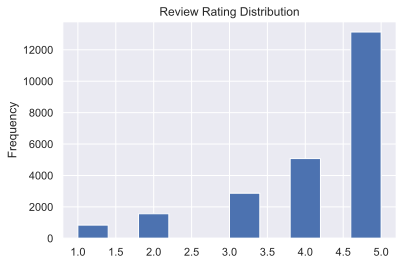

In [63]:
data['Rating'].plot(kind='hist', x="Rating", y='Count', title='Review Rating Distribution')

#### using plotly

In [64]:
data['Rating'].iplot(kind='hist', xTitle='Rating', yTitle='Count', color='blue',
                     title='Review Rating Distribution')

#### 5.2.b.reviewers' age

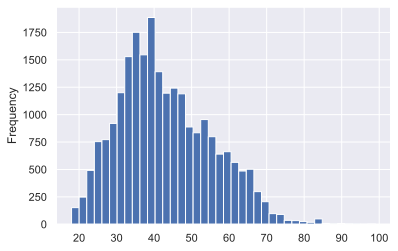

In [65]:
data['Age'].plot(kind='hist', bins=40, x='Age', y='Count')

In [66]:
data['Age'].iplot(kind='hist', bins=40 , xTitle='Age', yTitle='Count', colors='blue', linecolor= 'black',
                 title= "Reviewers' Age Distribution")

We have segmented age into different age groups which has easier to understand approach

- Most reviews have come from age group 35-39 i.e 4566. 
- Notice there are very few from age 0-20. This makes sense as mostly kids under 18 are dependant.
- Same lower review patterns are observed from age 70 onwards i.e senior citizens have very few reviews in dataset.

### 5.3. Distribution of Review Text Length and Word Count

review_len, word_count, and avg_len_wrd are our key features here

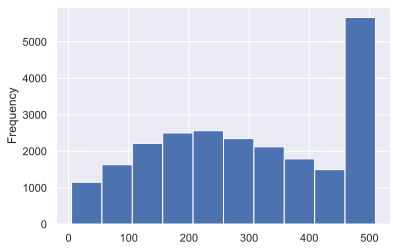

In [67]:
data['review_len'].plot(kind='hist')

Most reviews are in 500 length showing that people are very expressive in their reviews.

In [68]:
data['review_len'].iplot(kind='hist')

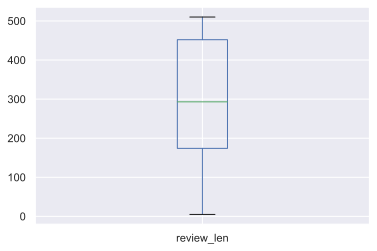

In [69]:
data.review_len.plot(kind='box')

We can see upper and lower limits of review lengths

In [70]:
data.review_len.iplot(kind='box')

In [71]:
data.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  polarity  compound_polarity  neutral    neg    pos sent_type  \
0  Intimates  0.633333             0.8932    0.272  0.000  0.728       pos   
1    Dresses  0.339583             0.9729    0.673  0.000  0.327       pos   
2    Dresses  0.073675             0.9427    0.792  0.027  0.181       pos   
3      Pants  0.550000             0.5727    0.360  0.220  0.421       pos   
4    Blouses  0.512891             0.9291    0.700  0.000  0.300       pos   

   review_len  word_count  avg_len_wrd  
0          53           8     5.750000  
1         305          64     3.703125  
2         500          98     4.112245  
3         125          23     4.478261  
4         192          36     4.361111

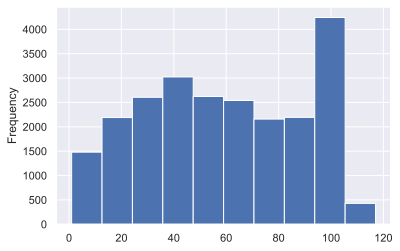

In [72]:
data['word_count'].plot(kind='hist')

Most reviews have word length of 100. There are very few in 100-120 word count

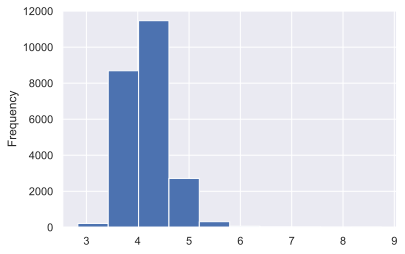

In [73]:
data['avg_len_wrd'].plot(kind='hist')

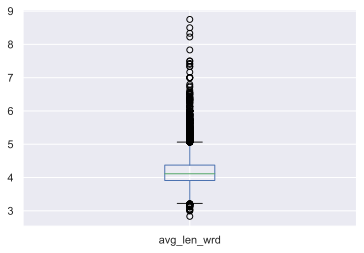

In [74]:
data['avg_len_wrd'].plot(kind='box')

In [75]:
data['avg_len_wrd'].iplot(kind='hist')

### 5.4)- Distribution of Department , Division , and Class

- Department Name , Division Name , Class Name

In [76]:
data['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
other          14
Name: Department Name, dtype: int64

#### using groupby

In [77]:
data.groupby('Department Name').count()

Age  Review Text  Rating  Recommended IND  \
Department Name                                                
Bottoms           3799         3799    3799             3799   
Dresses           6319         6319    6319             6319   
Intimate          1735         1735    1735             1735   
Jackets           1032         1032    1032             1032   
Tops             10468        10468   10468            10468   
Trend              119          119     119              119   
other               14           14      14               14   

                 Positive Feedback Count  Division Name  Class Name  polarity  \
Department Name                                                                 
Bottoms                             3799           3799        3799      3799   
Dresses                             6319           6319        6319      6319   
Intimate                            1735           1735        1735      1735   
Jackets                             1032           1032        1032      1032   
Tops                               10468          10468       10468     10468   
Trend                                119            119         119       119   
other                                 14             14          14        14   

                 compound_polarity  neutral    neg    pos  sent_type  \
Department Name                                                        
Bottoms                       3799     3799   3799   3799       3799   
Dresses                       6319     6319   6319   6319       6319   
Intimate                      1735     1735   1735   1735       1735   
Jackets                       1032     1032   1032   1032       1032   
Tops                         10468    10468  10468  10468      10468   
Trend                          119      119    119    119        119   
other                           14       14     14     14         14   

                 review_len  word_count  avg_len_wrd  
Department Name                                       
Bottoms                3799        3799         3799  
Dresses                6319        6319         6319  
Intimate               1735        1735         1735  
Jackets                1032        1032         1032  
Tops                  10468       10468        10468  
Trend                   119         119          119  
other                    14          14           14

In [78]:
data['Department Name'].value_counts().iplot(kind='bar')

#### 5.4.b.For Division Name

In [79]:
data['Division Name'].value_counts().iplot(kind='bar')

#### 5.4.c.For Class Name

In [80]:
data['Class Name'].value_counts().iplot(kind='bar')

# 6)- Distribution of Token


Unigram , Bigram, Trigram

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
 def freq_unigram(x,n):
        vec = CountVectorizer(). fit(x)
        bow = vec.transform(x)
        sum_words = bow.sum(axis=0)
        words_freq = [(word , sum_words[0 , idx]) for word , idx in vec.vocabulary_.items()]
        words_freq = sorted (words_freq , key=lambda x:x[1], reverse=True)
        return words_freq[:n]

In [83]:
freqwords=freq_unigram(data['Review Text'], 10)
freqwords

[('the', 76167),
 ('it', 49284),
 ('and', 49009),
 ('is', 38150),
 ('this', 25762),
 ('to', 24583),
 ('in', 20723),
 ('not', 17031),
 ('but', 16556),
 ('on', 15328)]

In [84]:
df_unigram=pd.DataFrame(freqwords, columns=['freq_unigrams','count'])
df_unigram

freq_unigrams  count
0           the  76167
1            it  49284
2           and  49009
3            is  38150
4          this  25762
5            to  24583
6            in  20723
7           not  17031
8           but  16556
9            on  15328

#### 6a.plot unigram using plotly

In [85]:
df_unigram= df_unigram.set_index('freq_unigrams')
df_unigram

count
freq_unigrams       
the            76167
it             49284
and            49009
is             38150
this           25762
to             24583
in             20723
not            17031
but            16556
on             15328

In [86]:
# ploting 
df_unigram.iplot(kind='bar',xTitle='Number of Unigram', yTitle='Count',
                title='Top 10 unigram words in our data')

#### 6b. plot using Bigram

In [87]:
 def freq_bigram(x,n):
        vec = CountVectorizer(ngram_range=(2,2)). fit(x)
        bow = vec.transform(x)
        sum_words = bow.sum(axis=0)
        words_freq = [(word , sum_words[0 , idx]) for word , idx in vec.vocabulary_.items()]
        words_freq = sorted (words_freq , key=lambda x:x[1], reverse=True)
        return words_freq[:n]

In [88]:
freq_bigram_wrds=freq_bigram(data['Review Text'], 10)

In [89]:
df_bigram=pd.DataFrame(freq_bigram_wrds, columns=['freq_bigrams','count'])
df_bigram= df_bigram.set_index('freq_bigrams')
# ploting 
df_bigram.iplot(kind='bar',xTitle='Number of bigram', yTitle='Count',
                title='Top 10 bigram words in our data')

#### 6c. Plot using Trigram

In [90]:
 def freq_trigram(x,n):
        vec = CountVectorizer(ngram_range=(3,3)). fit(x)
        bow = vec.transform(x)
        sum_words = bow.sum(axis=0)
        words_freq = [(word , sum_words[0 , idx]) for word , idx in vec.vocabulary_.items()]
        words_freq = sorted (words_freq , key=lambda x:x[1], reverse=True)
        return words_freq[:n]

In [91]:
freq_trigram_wrds=freq_trigram(data['Review Text'], 10)
df_trigram=pd.DataFrame(freq_trigram_wrds, columns=['freq_trigrams','count'])
df_trigram= df_trigram.set_index('freq_trigrams')
df_trigram

count
freq_trigrams         
true to size      1316
the fabric is     1301
and it is         1126
this dress is     1123
it is very         977
but it is          921
it is not          910
the material is    896
if you are         733
in the store       728

In [92]:
# ploting 
df_trigram.iplot(kind='bar',xTitle='Number of trigram', yTitle='Count',
                title='Top 10 trigram words in our data')

# 7)- Distribution of Token after removal of StopWords

### 7.1. Unigram Plot

In [95]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['Review Text'], 10)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Unigram' , 'count'])
df2.groupby('Unigram').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar',xTitle='Number of Unigrams', yTitle='count', title='Top 20 words in Review after removal of Stopwords')

dress 10567
love 8951
size 8772
fit 7325
like 7149
wear 6439
great 6117
just 5608
fabric 4798
small 4729


### 7.2.Plot Bigram

In [96]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data['Review Text'], 10)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Bigram' , 'count'])
df3.groupby('Bigram').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar',xTitle='Number of Bigrams', yTitle='count', title='Top 20 Bigrams in Review after cleaning data')

true size 1347
love dress 766
usually wear 694
looks great 620
fit perfectly 609
size small 540
fits perfectly 489
usual size 479
just right 434
look like 426


### 7.3. Plot Trigram

In [97]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(data['Review Text'], 10)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['trigrams' , 'count'])
df5.groupby('trigrams').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Top 10 Trigrams', yTitle='count',title='Top 20 Trigrams in review after cleanup')

fits true size 280
fit true size 229
runs true size 148
love love love 143
usually wear size 136
ordered usual size 107
does run large 96
really wanted love 94
wanted love dress 88
usually wear small 80
